#***2. Data Wrangling***


##2.3 Imports

In [2]:
#Code task 1#

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
    

def save_file(data, fname, dname):
    """Save a datafile (data) to a specific location (dname) and filename (fname)
    
    Currently valid formats are limited to CSV or PKL."""
    
    if not os.path.exists(dname):
        os.mkdir(dname)
        print(f'Directory {dname} was created.')
        
    fpath = os.path.join(dname, fname)
    
    
    if os.path.exists(fpath):
        print("A file already exists with this name.\n")

        yesno = None
        while yesno != "Y" and yesno != "N":
            yesno = input('Do you want to overwrite? (Y/N)').strip()[0].capitalize()
            if yesno == "Y":
                print(f'Writing file.  "{fpath}"')
                _save_file(data, fpath)
                break  # Not required
            elif yesno == "N":
                print('\nPlease re-run this cell with a new filename.')
                break  # Not required
            else:
                print('\nUnknown input, please enter "Y" or "N".')

    else:  # path does not exist, ok to save the file
        print(f'Writing file.  "{fpath}"')
        _save_file(data, fpath)
        
        
        
        
        
        
def _save_file(data, fpath):
    valid_ftypes = ['.csv', '.pkl']
    
    assert (fpath[-4:] in valid_ftypes), "Invalid file type.  Use '.csv' or '.pkl'"

    # Figure out what kind of file we're dealing with by name
    if fpath[-3:] == 'csv':
        data.to_csv(fpath, index=False)
    elif fpath[-3:] == 'pkl':
        with open(fpath, 'wb') as f:
            pickle.dump(data, f)

##2.4 Objectives

There are some fundamental questions to resolve in this notebook before you move on.

Do you think you may have the data you need to tackle the desired question?
Have you identified the required target value?
Do you have potentially useful features?
Do you have any fundamental issues with the data?

##2.5 Load the Ski Resort data

In [3]:
url = "https://raw.githubusercontent.com/springboard-curriculum/DataScienceGuidedCapstone/master/raw_data/ski_resort_data.csv"
ski_data = pd.read_csv(url)

In [4]:
#Code task 2#

ski_data.describe()

,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
count,330.000000,330.000000,330.000000,330.000000,164.000000,330.000000,330.000000,330.000000,330.00000,330.000000,...,325.000000,327.000000,284.000000,279.000000,329.000000,316.000000,276.000000,279.000000,283.000000,187.000000
mean,4591.818182,1215.427273,3374.000000,0.172727,0.006098,0.184848,1.018182,0.933333,1.50000,1.833333,...,1.433231,739.801223,174.873239,115.103943,63.656535,185.316456,57.916957,64.166810,120.053004,100.395722
std,3735.535934,947.864557,3117.121621,0.559946,0.078087,0.651685,2.198294,1.312245,1.61913,1.815028,...,1.156171,1816.167441,261.336125,35.063251,109.429928,136.356842,26.140126,24.554584,31.045963,105.169620
min,315.000000,60.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,8.000000,2.000000,3.000000,6.000000,18.000000,15.000000,17.000000,30.000000,2.000000
25%,1403.750000,461.250000,869.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,...,0.500000,85.000000,50.000000,97.000000,50.000000,69.000000,40.000000,47.000000,100.000000,40.000000
50%,3127.500000,964.500000,1561.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,...,1.000000,200.000000,100.000000,114.000000,58.000000,150.000000,50.000000,60.000000,120.000000,72.000000
75%,7806.000000,1800.000000,6325.250000,0.000000,0.000000,0.000000,1.000000,1.000000,2.00000,3.000000,...,2.000000,690.000000,200.500000,135.000000,69.000000,300.000000,71.000000,77.500000,139.500000,114.000000
max,13487.000000,4425.000000,10800.000000,4.000000,1.000000,6.000000,15.000000,8.000000,8.00000,14.000000,...,6.000000,26819.000000,3379.000000,305.000000,2019.000000,669.000000,179.000000,179.000000,305.000000,650.000000


In [5]:
#Code task 3#

ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


##2.6 Explore the Data

###2.6.1 Find your dataset

In [6]:
#Code task 4#

ski_data[ski_data.Name == 'Big Mountain Resort'].transpose

<bound method DataFrame.transpose of                     Name   Region    state  summit_elev  vertical_drop  \
151  Big Mountain Resort  Montana  Montana         6817           2353   

     base_elev  trams  fastEight  fastSixes  fastQuads  ...  LongestRun_mi  \
151       4464      0        0.0          0          3  ...            3.3   

     SkiableTerrain_ac  Snow Making_ac  daysOpenLastYear  yearsOpen  \
151             3000.0           600.0             123.0       72.0   

     averageSnowfall  AdultWeekday  AdultWeekend  projectedDaysOpen  \
151            333.0          81.0          81.0              123.0   

     NightSkiing_ac  
151           600.0  

[1 rows x 27 columns]>

###2.6.2 Find Missing Values

In [7]:
#Code task 5#

missing = pd.concat([ski_data.isnull().sum(), 100 * ski_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False)

,count,%
fastEight,166,50.303030
NightSkiing_ac,143,43.333333
AdultWeekday,54,16.363636
AdultWeekend,51,15.454545
daysOpenLastYear,51,15.454545
TerrainParks,51,15.454545
projectedDaysOpen,47,14.242424
Snow Making_ac,46,13.939394
averageSnowfall,14,4.242424
LongestRun_mi,5,1.515152


###2.6.3 Categorical Features

In [8]:
#Code task 6#
ski_data.select_dtypes(include=['object'])

,Name,Region,state
0,Alyeska Resort,Alaska,Alaska
1,Eaglecrest Ski Area,Alaska,Alaska
2,Hilltop Ski Area,Alaska,Alaska
3,Arizona Snowbowl,Arizona,Arizona
4,Sunrise Park Resort,Arizona,Arizona
...,...,...,...
325,Meadowlark Ski Lodge,Wyoming,Wyoming
326,Sleeping Giant Ski Resort,Wyoming,Wyoming
327,Snow King Resort,Wyoming,Wyoming
328,Snowy Range Ski & Recreation Area,Wyoming,Wyoming


2.6.3.1 Unique Resort Names

In [9]:
#Code task 7#

ski_data['Name'].value_counts()

Crystal Mountain       2
Alyeska Resort         1
Brandywine             1
Boston Mills           1
Alpine Valley          1
                      ..
Mt. Brighton           1
Mount Bohemia          1
Mont Ripley            1
Marquette Mountain     1
White Pine Ski Area    1
Name: Name, Length: 329, dtype: int64

**Q: 1** Is this resort duplicated if you take into account Region and/or state 


In [10]:
ski_data.loc[ski_data['Name'] == 'Crystal Mountain']

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
104,Crystal Mountain,Michigan,Michigan,1132,375,757,0,0.0,0,1,...,0.3,102.0,96.0,120.0,63.0,132.0,54.0,64.0,135.0,56.0
295,Crystal Mountain,Washington,Washington,7012,3100,4400,1,NaN,2,2,...,2.5,2600.0,10.0,NaN,57.0,486.0,99.0,99.0,NaN,NaN


In [11]:
#Code task 8#
#Concatenate the string columns 'Name' and 'Region' and count the values again (as above)
(ski_data['Name'] + ', ' + ski_data['Region']).value_counts()

Alyeska Resort, Alaska          1
Snow Trails, Ohio               1
Brandywine, Ohio                1
Boston Mills, Ohio              1
Alpine Valley, Ohio             1
                               ..
Mt. Brighton, Michigan          1
Mount Bohemia, Michigan         1
Mont Ripley, Michigan           1
Marquette Mountain, Michigan    1
White Pine Ski Area, Wyoming    1
Length: 330, dtype: int64

In [12]:
#Code task 9#
#Concatenate 'Name' and 'state' and count the values again (as above)
(ski_data['Name'] + ', ' + ski_data['state']).value_counts()

Alyeska Resort, Alaska          1
Snow Trails, Ohio               1
Brandywine, Ohio                1
Boston Mills, Ohio              1
Alpine Valley, Ohio             1
                               ..
Mt. Brighton, Michigan          1
Mount Bohemia, Michigan         1
Mont Ripley, Michigan           1
Marquette Mountain, Michigan    1
White Pine Ski Area, Wyoming    1
Length: 330, dtype: int64

Because `value_counts()` sorts descending, the rest of the counts must be 1.

**A: 1** No, these two resorts named "Crystal Mountain" are in different states and regions.  Therefore we know that these are two different resorts.

2.6.3.2 Region and State

In [13]:
#Code task 10#

(ski_data.Region != ski_data.state).sum()

33

In [14]:
ski_data['Region'].value_counts()

New York               33
Michigan               29
Sierra Nevada          22
Colorado               22
Pennsylvania           19
Wisconsin              16
New Hampshire          16
Vermont                15
Minnesota              14
Idaho                  12
Montana                12
Massachusetts          11
Washington             10
New Mexico              9
Maine                   9
Wyoming                 8
Utah                    7
Salt Lake City          6
North Carolina          6
Oregon                  6
Connecticut             5
Ohio                    5
Virginia                4
West Virginia           4
Illinois                4
Mt. Hood                4
Alaska                  3
Iowa                    3
South Dakota            2
Arizona                 2
Nevada                  2
Missouri                2
Indiana                 2
New Jersey              2
Rhode Island            1
Tennessee               1
Maryland                1
Northern California     1
Name: Region

A casual inspection by eye reveals some non-state names such as Sierra Nevada, Salt Lake City, and Northern California. Tabulate the differences between Region and state. On a note regarding scaling to larger data sets, you might wonder how you could spot such cases when presented with millions of rows. This is an interesting point. Imagine you have access to a database with a Region and state column in a table and there are millions of rows. You wouldn't eyeball all the rows looking for differences! Bear in mind that our first interest lies in establishing the answer to the question "Are they always the same?" One approach might be to ask the database to return records where they differ, but limit the output to 10 rows. If there were differences, you'd only get up to 10 results, and so you wouldn't know whether you'd located all differences, but you'd know that there were 'a nonzero number' of differences. If you got an empty result set back, then you would know that the two columns always had the same value. At the risk of digressing, some values in one column only might be NULL (missing) and different databases treat NULL differently, so be aware that on many an occasion a seamingly 'simple' question gets very interesting to answer very quickly!

In [15]:
#Code task 11#
#Filter the ski_data dataframe for rows where 'Region' and 'state' are different,
#group that by 'state' and perform `value_counts` on the 'Region'
(ski_data[ski_data.Region != ski_data.state]
 .groupby('state')['Region']
 .value_counts())

state       Region             
California  Sierra Nevada          20
            Northern California     1
Nevada      Sierra Nevada           2
Oregon      Mt. Hood                4
Utah        Salt Lake City          6
Name: Region, dtype: int64

2.6.3.3 Number of distinct regions and states

In [16]:
#Code task 12#
#Select the 'Region' and 'state' columns from ski_data and use the `nunique` method to calculate
#the number of unique values in each
ski_data[['Region', 'state']].nunique(axis = 0)

Region    38
state     35
dtype: int64

2.6.3.4 Distribution Of Resorts

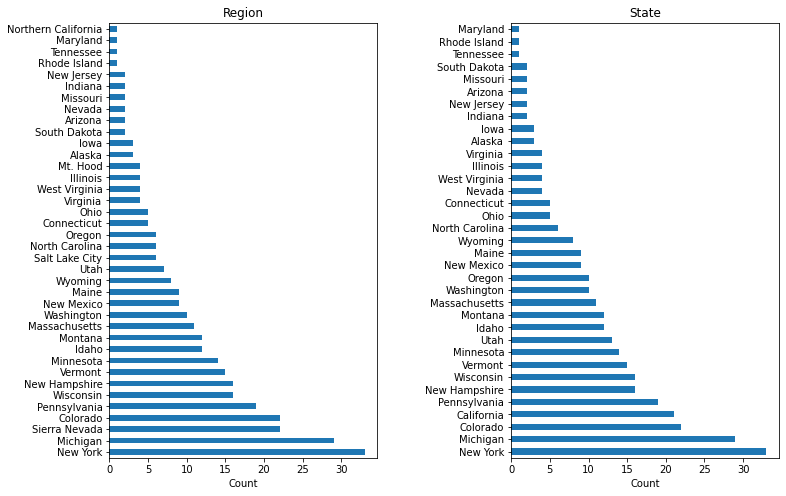

In [17]:
#Code task 13#
#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
axe = ax.ravel()

#Specify a horizontal barplot ('barh') as kind of plot (kind=)
ski_data.Region.value_counts().plot(kind='barh', ax=axe[0])
#Give the plot a helpful title of 'Region'
axe[0].set_title('Region')
#Label the xaxis 'Count'
axe[0].set_xlabel('Count')
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
ski_data.state.value_counts().plot(kind='barh', ax=axe[1])
#Give the plot a helpful title of 'state'
axe[1].set_title('State')
#Label the xaxis 'Count'
axe[1].set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5);
#You're encouraged to explore a few different figure sizes, orientations, and spacing here
# as the importance of easy-to-read and informative figures is frequently understated
# and you will find the ability to tweak figures invaluable later on

How's your geography? Looking at the distribution of States, you see New York accounting for the majority of resorts. Our target resort is in Montana, which comes in at 13th place. You should think carefully about how, or whether, you use this information. Does New York command a premium because of its proximity to population? Even if a resort's State were a useful predictor of ticket price, your main interest lies in Montana. Would you want a model that is skewed for accuracy by New York? Should you just filter for Montana and create a Montana-specific model? This would slash your available data volume. Your problem task includes the contextual insight that the data are for resorts all belonging to the same market share. This suggests one might expect prices to be similar amongst them. You can look into this. A boxplot grouped by State is an ideal way to quickly compare prices. Another side note worth bringing up here is that, in reality, the best approach here definitely would include consulting with the client or other domain expert. They might know of good reasons for treating states equivalently or differently. The data scientist is rarely the final arbiter of such a decision. But here, you'll see if we can find any supporting evidence for treating states the same or differently.

2.6.3.5 Distribution Of Ticket Price By State

2.6.3.5.1 Average weekend and weekday price by state

In [18]:
#Code task 14#
# Calculate average weekday and weekend price by state and sort by the average of the two
# Hint: use the pattern dataframe.groupby(<grouping variable>)[<list of columns>].mean()
state_price_means = ski_data.groupby('state')[['AdultWeekday', 'AdultWeekend']].mean()
state_price_means.head()

,AdultWeekday,AdultWeekend
state,,
Alaska,47.333333,57.333333
Arizona,81.500000,83.500000
California,78.214286,81.416667
Colorado,90.714286,90.714286
Connecticut,47.800000,56.800000


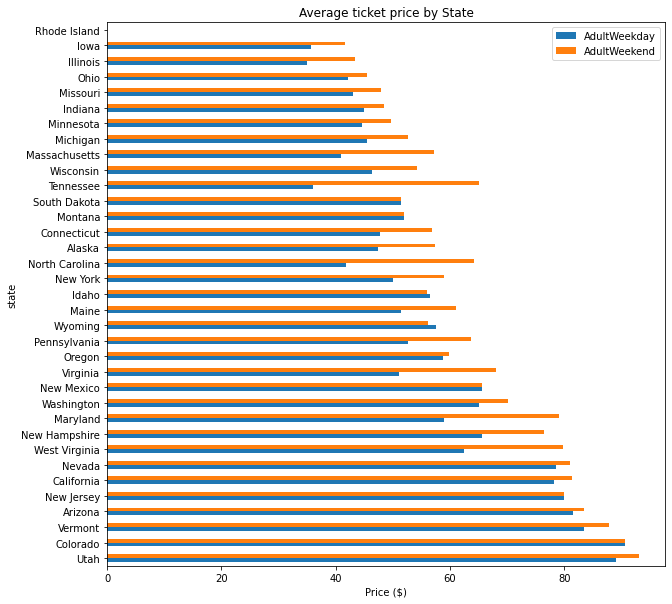

In [19]:
# The next bit simply reorders the index by increasing average of weekday and weekend prices
# Compare the index order you get from
# state_price_means.index
# with
# state_price_means.mean(axis=1).sort_values(ascending=False).index
# See how this expression simply sits within the reindex()
(state_price_means.reindex(index=state_price_means.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average ticket price by State'))
plt.xlabel('Price ($)');

2.6.3.5.2 Distribution of weekday and weekend price by state

In [20]:
#Code task 15#
#Use the pd.melt function, pass in the ski_data columns 'state', 'AdultWeekday', and 'Adultweekend' only,
#specify 'state' for `id_vars`
#gather the ticket prices from the 'Adultweekday' and 'AdultWeekend' columns using the `value_vars` argument,
#call the resultant price column 'Price' via the `value_name` argument,
#name the weekday/weekend indicator column 'Ticket' via the `var_name` argument
ticket_prices = pd.melt(ski_data[['state', 'AdultWeekday', 'AdultWeekend']], 
                        id_vars='state', 
                        var_name='Ticket', 
                        value_vars=['AdultWeekday', 'AdultWeekend'], 
                        value_name='Price')

In [21]:
ticket_prices.head()

,state,Ticket,Price
0,Alaska,AdultWeekday,65.0
1,Alaska,AdultWeekday,47.0
2,Alaska,AdultWeekday,30.0
3,Arizona,AdultWeekday,89.0
4,Arizona,AdultWeekday,74.0


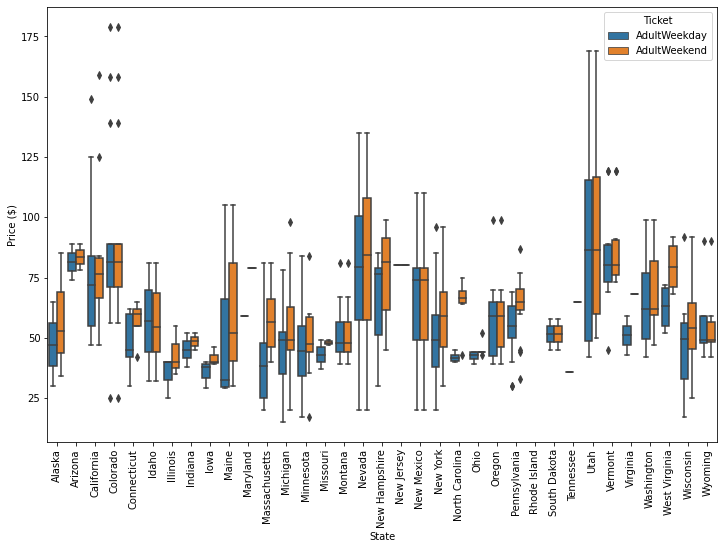

In [22]:
#Code task 16#
#Create a seaborn boxplot of the ticket price dataframe we created above,
#with 'state' on the x-axis, 'Price' as the y-value, and a hue that indicates 'Ticket'
#This will use boxplot's x, y, hue, and data arguments.
plt.subplots(figsize=(12, 8))
sns.boxplot(x='state', y='Price', hue='Ticket', data=ticket_prices)
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)')
plt.xlabel('State');

Aside from some relatively expensive ticket prices in California, Colorado, and Utah, most prices appear to lie in a broad band from around 25 to over 100 dollars. Some States show more variability than others. Montana and South Dakota, for example, both show fairly small variability as well as matching weekend and weekday ticket prices. Nevada and Utah, on the other hand, show the most range in prices. Some States, notably North Carolina and Virginia, have weekend prices far higher than weekday prices. You could be inspired from this exploration to consider a few potential groupings of resorts, those with low spread, those with lower averages, and those that charge a premium for weekend tickets. However, you're told that you are taking all resorts to be part of the same market share, you could argue against further segment the resorts. Nevertheless, ways to consider using the State information in your modelling include:

disregard State completely
retain all State information
retain State in the form of Montana vs not Montana, as our target resort is in Montana
You've also noted another effect above: some States show a marked difference between weekday and weekend ticket prices. It may make sense to allow a model to take into account not just State but also weekend vs weekday.

###2.6.4 Numeric Features

2.6.4.1 Numeric data summary

In [23]:
#Code task 17#
#Call ski_data's `describe` method for a statistical summary of the numerical columns
#Hint: there are fewer summary stat columns than features, so displaying the transpose
#will be useful again
ski_data.describe().transpose

<bound method DataFrame.transpose of         summit_elev  vertical_drop     base_elev       trams   fastEight  \
count    330.000000     330.000000    330.000000  330.000000  164.000000   
mean    4591.818182    1215.427273   3374.000000    0.172727    0.006098   
std     3735.535934     947.864557   3117.121621    0.559946    0.078087   
min      315.000000      60.000000     70.000000    0.000000    0.000000   
25%     1403.750000     461.250000    869.000000    0.000000    0.000000   
50%     3127.500000     964.500000   1561.500000    0.000000    0.000000   
75%     7806.000000    1800.000000   6325.250000    0.000000    0.000000   
max    13487.000000    4425.000000  10800.000000    4.000000    1.000000   

        fastSixes   fastQuads        quad     triple      double  ...  \
count  330.000000  330.000000  330.000000  330.00000  330.000000  ...   
mean     0.184848    1.018182    0.933333    1.50000    1.833333  ...   
std      0.651685    2.198294    1.312245    1.61913    1.8

Recall you're missing the ticket prices for some 16% of resorts. This is a fundamental problem that means you simply lack the required data for those resorts and will have to drop those records. But you may have a weekend price and not a weekday price, or vice versa. You want to keep any price you have.

In [24]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0    82.424242
2    14.242424
1     3.333333
dtype: float64

Just over 82% of resorts have no missing ticket price, 3% are missing one value, and 14% are missing both. You will definitely want to drop the records for which you have no price information, however you will not do so just yet. There may still be useful information about the distributions of other features in that 14% of the data.

2.6.4.2 Distributions Of Feature Values

Note that, although we are still in the 'data wrangling and cleaning' phase rather than exploratory data analysis, looking at distributions of features is immensely useful in getting a feel for whether the values look sensible and whether there are any obvious outliers to investigate. Some exploratory data analysis belongs here, and data wrangling will inevitably occur later on. It's more a matter of emphasis. Here, we're interesting in focusing on whether distributions look plausible or wrong. Later on, we're more interested in relationships and patterns.

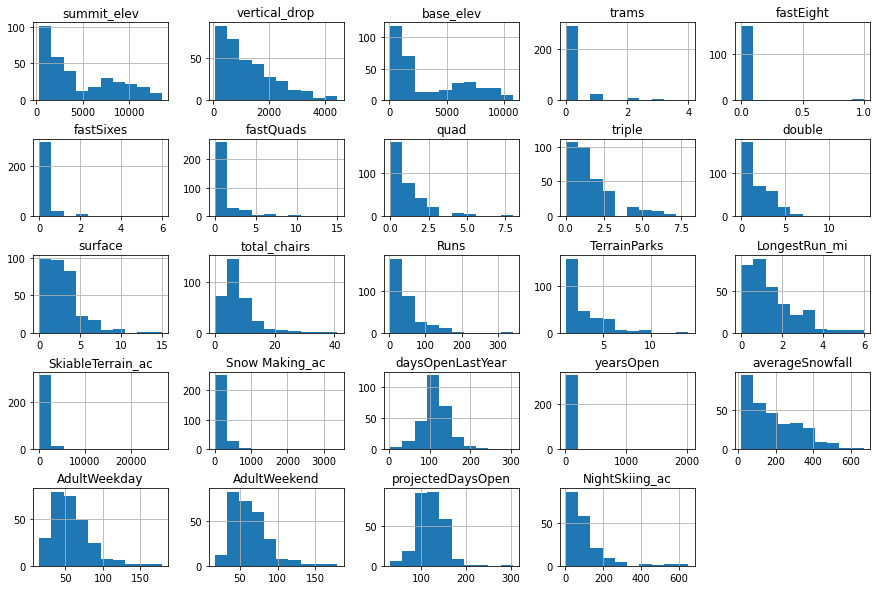

In [25]:
#Code task 18#
#Call ski_data's `hist` method to plot histograms of each of the numeric features
#Try passing it an argument figsize=(15,10)
#Try calling plt.subplots_adjust() with an argument hspace=0.5 to adjust the spacing
#It's important you create legible and easy-to-read plots
ski_data.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);


#plt.subplots_adjust(hspace=___);
#Hint: notice how the terminating ';' "swallows" some messy output and leads to a tidier notebook

What features do we have possible cause for concern about and why?

SkiableTerrain_ac because values are clustered down the low end,
Snow Making_ac for the same reason,
fastEight because all but one value is 0 so it has very little variance, and half the values are missing,
fastSixes raises an amber flag; it has more variability, but still mostly 0,
trams also may get an amber flag for the same reason,
yearsOpen because most values are low but it has a maximum of 2019, which strongly suggests someone recorded calendar year rather than number of years.

2.6.4.2.1 SkiableTerrain_ac

In [26]:
#Code task 19#
#Filter the 'SkiableTerrain_ac' column to print the values greater than 10000
ski_data.SkiableTerrain_ac[(ski_data.SkiableTerrain_ac) > 10000]

39    26819.0
Name: SkiableTerrain_ac, dtype: float64

**Q: 2** One resort has an incredibly large skiable terrain area! Which is it?


In [27]:
print(ski_data.Name[39])


Silverton Mountain


**A: 2** Silverton Mountain


In [28]:
#Code task 21#
#Use the .loc accessor to print the 'SkiableTerrain_ac' value only for this resort
ski_data.loc[39, 'SkiableTerrain_ac']

26819.0

In [29]:
#Code task 22#
#Use the .loc accessor again to modify this value with the correct value of 1819
ski_data.loc[39, 'SkiableTerrain_ac'] = 1819

In [30]:
#Code task 23#
#Use the .loc accessor a final time to verify that the value has been modified
ski_data.loc[39, 'SkiableTerrain_ac']

1819.0

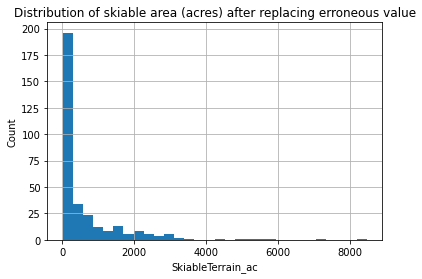

In [31]:
ski_data.SkiableTerrain_ac.hist(bins=30)
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('Count')
plt.title('Distribution of skiable area (acres) after replacing erroneous value');

2.6.4.2.2 Snow Making_ac

In [32]:
ski_data['Snow Making_ac'][ski_data['Snow Making_ac'] > 1000]

11    3379.0
18    1500.0
Name: Snow Making_ac, dtype: float64

In [33]:
ski_data[ski_data['Snow Making_ac'] > 3000].T

,11
Name,Heavenly Mountain Resort
Region,Sierra Nevada
state,California
summit_elev,10067
vertical_drop,3500
base_elev,7170
trams,2
fastEight,0.0
fastSixes,2
fastQuads,7


2.6.4.2.3 fastEight

In [34]:
ski_data.fastEight.value_counts()

0.0    163
1.0      1
Name: fastEight, dtype: int64

In [35]:
#Code task 24#
#Drop the 'fastEight' column from ski_data. Use inplace=True
ski_data.drop(columns='fastEight', inplace=True)

In [36]:
#Code task 25#
#Filter the 'yearsOpen' column for values greater than 100
ski_data.yearsOpen[ski_data.yearsOpen > 100]

34      104.0
115    2019.0
Name: yearsOpen, dtype: float64

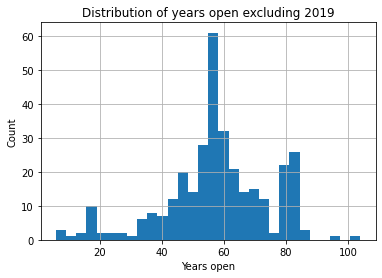

In [37]:
#Code task 26#
#Call the hist method on 'yearsOpen' after filtering for values under 1000
#Pass the argument bins=30 to hist(), but feel free to explore other values
ski_data.yearsOpen[ski_data.yearsOpen < 1000].hist(bins=30)
plt.xlabel('Years open')
plt.ylabel('Count')
plt.title('Distribution of years open excluding 2019');

In [38]:
ski_data.yearsOpen[ski_data.yearsOpen < 1000].describe()

count    328.000000
mean      57.695122
std       16.841182
min        6.000000
25%       50.000000
50%       58.000000
75%       68.250000
max      104.000000
Name: yearsOpen, dtype: float64

In [39]:
ski_data = ski_data[ski_data.yearsOpen < 1000]

2.6.4.2.4 fastSixes and Trams

##2.7 Derive State-wide Summary Statistics For Our Market Segment

In [40]:
#Code task 27#
#Add named aggregations for the sum of 'daysOpenLastYear', 'TerrainParks', and 'NightSkiing_ac'
#call them 'state_total_days_open', 'state_total_terrain_parks', and 'state_total_nightskiing_ac',
#respectively
#Finally, add a call to the reset_index() method (we recommend you experiment with and without this to see
#what it does)
state_summary = ski_data.groupby('state').agg(
    resorts_per_state=pd.NamedAgg(column='Name', aggfunc='size'), #could pick any column here
    state_total_skiable_area_ac=pd.NamedAgg(column='SkiableTerrain_ac', aggfunc='sum'),
    state_total_days_open=pd.NamedAgg(column='daysOpenLastYear', aggfunc='sum'),
    state_total_terrain_parks=pd.NamedAgg(column='TerrainParks', aggfunc='sum'),
    state_total_nightskiing_ac=pd.NamedAgg(column='NightSkiing_ac', aggfunc='sum')
).reset_index()
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac
0,Alaska,3,2280.0,345.0,4.0,580.0
1,Arizona,2,1577.0,237.0,6.0,80.0
2,California,21,25948.0,2738.0,81.0,587.0
3,Colorado,22,43682.0,3258.0,74.0,428.0
4,Connecticut,5,358.0,353.0,10.0,256.0


##2.8 Drop Rows With No Price Data

In [41]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0    82.317073
2    14.329268
1     3.353659
dtype: float64

In [42]:
#Code task 28#
#Use `missing_price` to remove rows from ski_data where both price values are missing
ski_data = ski_data[missing_price != 2]

##2.9 Review distributions

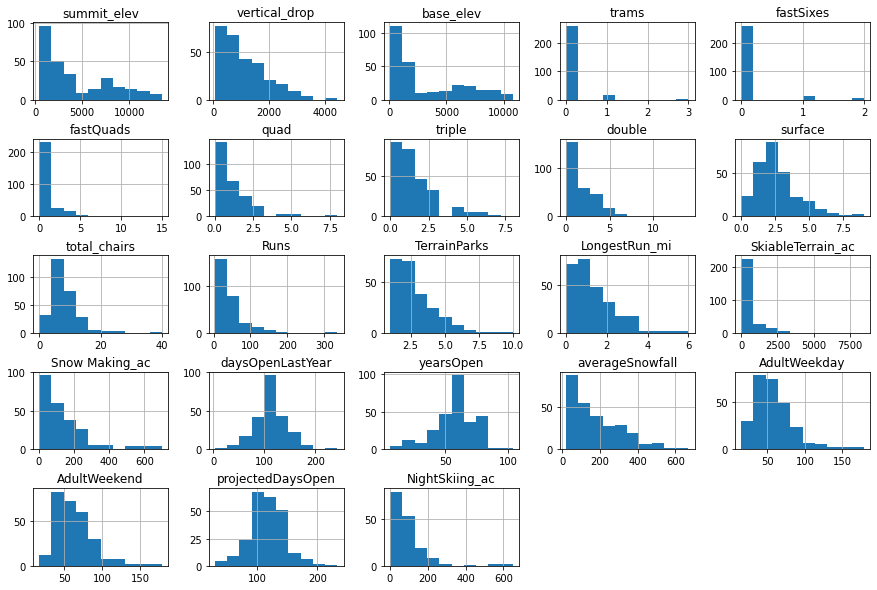

In [43]:
ski_data.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

##2.10 Population data

In [44]:
#Code task 29#
#Use pandas' `read_html` method to read the table from the URL below
states_url = 'https://simple.wikipedia.org/w/index.php?title=List_of_U.S._states&oldid=7168473'
usa_states = pd.read_html(states_url)

In [45]:
type(usa_states)

list

In [46]:
len(usa_states)

1

In [47]:
usa_states = usa_states[0]
usa_states.head()

Name &postal abbs. [1]                                Cities               \
  Name &postal abbs. [1] Name &postal abbs. [1].1      Capital   Largest[5]   
0                Alabama                       AL   Montgomery   Birmingham   
1                 Alaska                       AK       Juneau    Anchorage   
2                Arizona                       AZ      Phoenix      Phoenix   
3               Arkansas                       AR  Little Rock  Little Rock   
4             California                       CA   Sacramento  Los Angeles   

  Established[A] Population[B][3] Total area[4]          Land area[4]  \
  Established[A] Population[B][3]           mi2      km2          mi2   
0   Dec 14, 1819          4903185         52420   135767        50645   
1    Jan 3, 1959           731545        665384  1723337       570641   
2   Feb 14, 1912          7278717        113990   295234       113594   
3   Jun 15, 1836          3017804         53179   137732        52035   
4    Sep 9, 1850         39512223        163695   423967       155779   

           Water area[4]         Numberof Reps.  
       km2           mi2     km2 Numberof Reps.  
0   131171          1775    4597              7  
1  1477953         94743  245384              1  
2   294207           396    1026              9  
3   134771          1143    2961              4  
4   403466          7916   20501             53

In [48]:
#Code task 30#
#Use the iloc accessor to get the pandas Series for column number 4 from `usa_states`
#It should be a column of dates
established = usa_states.iloc[:, 4]

In [49]:
established

0     Dec 14, 1819
1      Jan 3, 1959
2     Feb 14, 1912
3     Jun 15, 1836
4      Sep 9, 1850
5      Aug 1, 1876
6      Jan 9, 1788
7      Dec 7, 1787
8      Mar 3, 1845
9      Jan 2, 1788
10    Aug 21, 1959
11     Jul 3, 1890
12     Dec 3, 1818
13    Dec 11, 1816
14    Dec 28, 1846
15    Jan 29, 1861
16     Jun 1, 1792
17    Apr 30, 1812
18    Mar 15, 1820
19    Apr 28, 1788
20     Feb 6, 1788
21    Jan 26, 1837
22    May 11, 1858
23    Dec 10, 1817
24    Aug 10, 1821
25     Nov 8, 1889
26     Mar 1, 1867
27    Oct 31, 1864
28    Jun 21, 1788
29    Dec 18, 1787
30     Jan 6, 1912
31    Jul 26, 1788
32    Nov 21, 1789
33     Nov 2, 1889
34     Mar 1, 1803
35    Nov 16, 1907
36    Feb 14, 1859
37    Dec 12, 1787
38    May 29, 1790
39    May 23, 1788
40     Nov 2, 1889
41     Jun 1, 1796
42    Dec 29, 1845
43     Jan 4, 1896
44     Mar 4, 1791
45    Jun 25, 1788
46    Nov 11, 1889
47    Jun 20, 1863
48    May 29, 1848
49    Jul 10, 1890
Name: (Established[A], Established[A]), dtype: obj

In [50]:
#Code task 31#
#Now use the iloc accessor again to extract columns 0, 5, and 6 and the dataframe's `copy()` method
#Set the names of these extracted columns to 'state', 'state_population', and 'state_area_sq_miles',
#respectively.
usa_states_sub = usa_states.iloc[:, [0, 6, 7]].copy()
usa_states_sub.columns = ['state', 'state_population', 'state_area_sq_miles']
usa_states_sub.head()

,state,state_population,state_area_sq_miles
0,Alabama,52420,135767
1,Alaska,665384,1723337
2,Arizona,113990,295234
3,Arkansas,53179,137732
4,California,163695,423967


In [51]:
#Code task 32#
#Find the states in `state_summary` that are not in `usa_states_sub`
#Hint: set(list1) - set(list2) is an easy way to get items in list1 that are not in list2
missing_states = set(state_summary.state) - set(usa_states_sub.state)
missing_states

{'Massachusetts', 'Pennsylvania', 'Rhode Island', 'Virginia'}

In [52]:
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20    Massachusetts[C]
37     Pennsylvania[C]
38     Rhode Island[D]
45         Virginia[C]
47       West Virginia
Name: state, dtype: object

In [53]:
usa_states_sub['state'] = usa_states_sub['state'].replace({'Massachusetts[C]':'Massachusetts'})
usa_states_sub['state'] = usa_states_sub['state'].replace({'Pennsylvania[C]':'Pennsylvania'})
usa_states_sub['state'] = usa_states_sub['state'].replace({'Rhode Island[D]':'Rhode Island'})
usa_states_sub['state'] = usa_states_sub['state'].replace({'Virginia[C]':'Virginia'})

In [54]:
#Code task 33#
#Use pandas' Series' `replace()` method to replace anything within square brackets (including the brackets)
#with the empty string. Do this inplace, so you need to specify the arguments:
#to_replace='\[.*\]' #literal square bracket followed by anything or nothing followed by literal closing bracket
#value='' #empty string as replacement
#regex=True #we used a regex in our `to_replace` argument
#inplace=True #Do this "in place"
usa_states_sub.state.replace(to_replace='\[.*\]', value='', regex=True, inplace=True)
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20    Massachusetts
37     Pennsylvania
38     Rhode Island
45         Virginia
47    West Virginia
Name: state, dtype: object

In [55]:
#Code task 34#
#And now verify none of our states are missing by checking that there are no states in
#state_summary that are not in usa_states_sub (as earlier using `set()`)
missing_states = set(state_summary.state) - set(usa_states_sub.state)
missing_states

set()

In [56]:
#Code task 35#
#Use 'state_summary's `merge()` method to combine our new data in 'usa_states_sub'
#specify the arguments how='left' and on='state'
state_summary = state_summary.merge(usa_states_sub, how='left', on='state')
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_population,state_area_sq_miles
0,Alaska,3,2280.0,345.0,4.0,580.0,665384,1723337
1,Arizona,2,1577.0,237.0,6.0,80.0,113990,295234
2,California,21,25948.0,2738.0,81.0,587.0,163695,423967
3,Colorado,22,43682.0,3258.0,74.0,428.0,104094,269601
4,Connecticut,5,358.0,353.0,10.0,256.0,5543,14357


##2.11 Target Feature

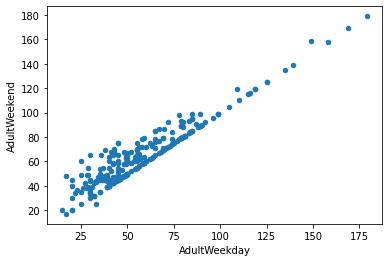

In [57]:
#Code task 36#
#Use ski_data's `plot()` method to create a scatterplot (kind='scatter') with 'AdultWeekday' on the x-axis and
#'AdultWeekend' on the y-axis
ski_data.plot(x='AdultWeekday', y='AdultWeekend', kind='scatter');

In [58]:
#Code task 37#
#Use the loc accessor on ski_data to print the 'AdultWeekend' and 'AdultWeekday' columns for Montana only
ski_data.loc[ski_data.state == 'Montana', ['AdultWeekend', 'AdultWeekday']]

,AdultWeekend,AdultWeekday
141,42.0,42.0
142,63.0,63.0
143,49.0,49.0
144,48.0,48.0
145,46.0,46.0
146,39.0,39.0
147,50.0,50.0
148,67.0,67.0
149,47.0,47.0
150,39.0,39.0


In [59]:
ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum()

AdultWeekend    4
AdultWeekday    7
dtype: int64

In [60]:
ski_data.drop(columns='AdultWeekday', inplace=True)
ski_data.dropna(subset=['AdultWeekend'], inplace=True)

In [61]:
ski_data.shape

(277, 25)

###2.11.1 Number Of Missing Values By Row - Resort

In [62]:
missing = pd.concat([ski_data.isnull().sum(axis=1), 100 * ski_data.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False).head(10)

,count,%
329,5,20.0
62,5,20.0
141,5,20.0
86,5,20.0
74,5,20.0
146,5,20.0
184,4,16.0
108,4,16.0
198,4,16.0
39,4,16.0


In [63]:
missing['%'].unique()

array([ 0.,  4.,  8., 12., 16., 20.])

In [64]:
missing['%'].value_counts()

0.0     107
4.0      94
8.0      45
12.0     15
16.0     10
20.0      6
Name: %, dtype: int64

In [65]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 329
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               277 non-null    object 
 1   Region             277 non-null    object 
 2   state              277 non-null    object 
 3   summit_elev        277 non-null    int64  
 4   vertical_drop      277 non-null    int64  
 5   base_elev          277 non-null    int64  
 6   trams              277 non-null    int64  
 7   fastSixes          277 non-null    int64  
 8   fastQuads          277 non-null    int64  
 9   quad               277 non-null    int64  
 10  triple             277 non-null    int64  
 11  double             277 non-null    int64  
 12  surface            277 non-null    int64  
 13  total_chairs       277 non-null    int64  
 14  Runs               274 non-null    float64
 15  TerrainParks       233 non-null    float64
 16  LongestRun_mi      272 non

##2.12 Save Data

In [66]:
ski_data.shape

(277, 25)

In [71]:
# save the data to a new csv file
datapath = ("C:\\Users\\crathgeb-pc\\Desktop\\Data Science\\ski_data_cleaned.csv")
save_file(ski_data, 'ski_data_cleaned.csv', datapath)

Directory C:\Users\crathgeb-pc\Desktop\Data Science\ski_data_cleaned.csv was created.
Writing file.  "C:\Users\crathgeb-pc\Desktop\Data Science\ski_data_cleaned.csv/ski_data_cleaned.csv"


In [72]:
# save the state_summary separately.
datapath = ("C:\\Users\\crathgeb-pc\\Desktop\\Data Science\\state_summary.csv")
save_file(state_summary, 'state_summary.csv', datapath)

Directory C:\Users\crathgeb-pc\Desktop\Data Science\state_summary.csv was created.
Writing file.  "C:\Users\crathgeb-pc\Desktop\Data Science\state_summary.csv/state_summary.csv"


##2.13 Summary

**Q: 3** Write a summary statement that highlights the key processes and findings from this notebook. This should include information such as the original number of rows in the data, whether our own resort was actually present etc. What columns, if any, have been removed? Any rows? Summarise the reasons why. Were any other issues found? What remedial actions did you take? State where you are in the project. Can you confirm what the target feature is for your desire to predict ticket price? How many rows were left in the data? Hint: this is a great opportunity to reread your notebook, check all cells have been executed in order and from a "blank slate" (restarting the kernel will do this), and that your workflow makes sense and follows a logical pattern. As you do this you can pull out salient information for inclusion in this summary. Thus, this section will provide an important overview of "what" and "why" without having to dive into the "how" or any unproductive or inconclusive steps along the way.

**A: 3** Originally, there were 330 rows in the dataset, one of which was our own resort, Big Mountain Resort.  I dropped the column “fastEight” and added the column “Price,” which reflected the combination of weekend and weekday ticket prices.  I then dropped the weekday price column and null values in the weekend price column.  I also dropped rows with null and duplicate values throughout the dataset.  This resulted in a dataset with 25 columns and 277 rows.  I found a duplicate resort name, but upon further examination found that a resort from two different places had the same name and determined that these were therefore separate resorts that just happen to have the same name.  Therefore, I kept both rows.  I examined apparent outliers to determine whether there were incorrect values and  corrected the number of years open of a resort where the value had been mistakenly given as over 2000 years.  While the value of one resort’s skiable area appeared to be larger than likely, further examination showed that the value was in fact accurate, and I therefore kept this value.  I also created a dataset with summary information for all resorts in each state.  At this point, the data is relatively clean, organized, and ready for further examination.